<a href="https://colab.research.google.com/github/YashNirwan/Spotify-Product-Analytics-NLP/blob/main/Spotify_Product_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Install & Import (The Setup)

In [2]:
# Install necessary libraries for NLP and Plotting
!pip install pandas matplotlib seaborn wordcloud nltk textblob -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Download the VADER lexicon (AI dictionary)
nltk.download('vader_lexicon', quiet=True)
print("✅ Libraries Installed and Imported")

✅ Libraries Installed and Imported


##Load Data (The Ingestion)

In [3]:
# Load the dataset
# We use error handling in case the filename is slightly different
try:
    df = pd.read_csv('reviews.csv')
    print("✅ Data Loaded Successfully")
except FileNotFoundError:
    print("❌ Error: Please upload 'reviews.csv' to the Files tab on the left.")

# Clean the dataframe: Drop missing values in review text
df.dropna(subset=['Review'], inplace=True)

# Preview the data
print(f"Total Rows: {len(df)}")
df.head(3)

✅ Data Loaded Successfully
Total Rows: 61594


,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN


##The AI Analysis (The Logic)

In [4]:
# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

print("🧠 Running Sentiment Analysis on 20,000 reviews (this may take 30 seconds)...")

# We limit to latest 20,000 for speed, but you can remove .head(20000) to run all
df_subset = df.head(20000).copy()

# Define function to score sentiment
def get_sentiment(text):
    try:
        return sia.polarity_scores(str(text))['compound']
    except:
        return 0

# Apply the function
df_subset['sentiment_score'] = df_subset['Review'].apply(get_sentiment)

# Categorize: Positive (>0.05), Negative (<-0.05), else Neutral
df_subset['category'] = df_subset['sentiment_score'].apply(
    lambda x: 'Negative' if x < -0.05 else ('Positive' if x > 0.05 else 'Neutral')
)

print("✅ Analysis Complete")

🧠 Running Sentiment Analysis on 20,000 reviews (this may take 30 seconds)...
✅ Analysis Complete


##Cell 4: Visualization (The Artifacts)

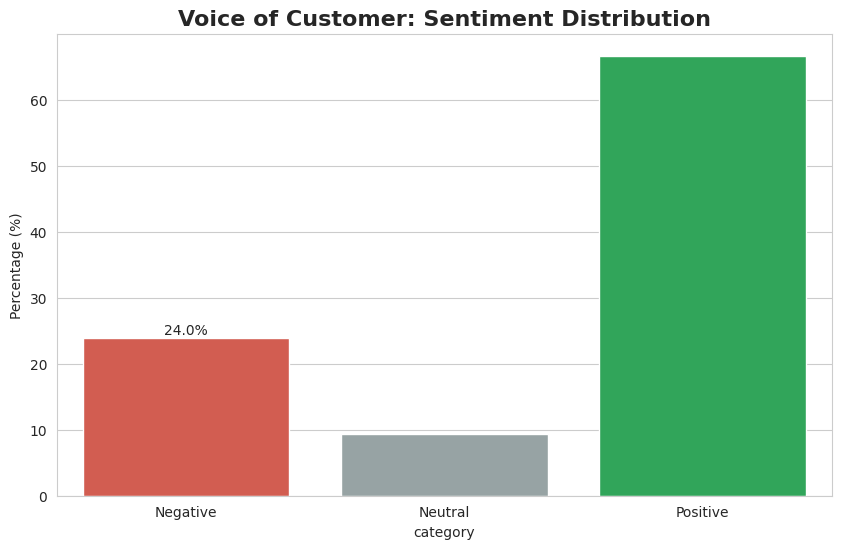

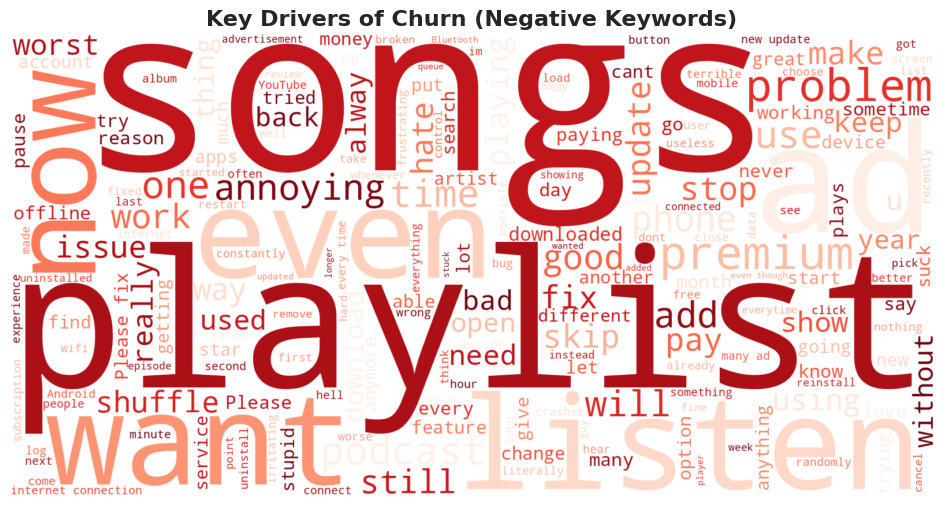

In [5]:
# Set the visual style
sns.set_style("whitegrid")

# CHART 1: Sentiment Distribution
plt.figure(figsize=(10, 6))
counts = df_subset['category'].value_counts(normalize=True) * 100
ax = sns.barplot(x=counts.index, y=counts.values, palette={'Positive': '#1db954', 'Negative': '#e74c3c', 'Neutral': '#95a5a6'}, order=['Negative', 'Neutral', 'Positive'])
plt.title('Voice of Customer: Sentiment Distribution', fontsize=16, fontweight='bold')
plt.ylabel('Percentage (%)')
plt.bar_label(ax.containers[0], fmt='%.1f%%')
plt.show()

# CHART 2: Negative Word Cloud
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["app", "spotify", "music", "song", "play", "listening"]) # Add common words to ignore

neg_text = " ".join(review for review in df_subset[df_subset['category'] == 'Negative']['Review'])
wordcloud = WordCloud(width=1600, height=800, background_color='white', colormap='Reds', stopwords=custom_stopwords).generate(neg_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Key Drivers of Churn (Negative Keywords)", fontsize=16, fontweight='bold')
plt.show()

##Key Findings & Action Plan:

#1. The "Shuffle" Algorithm is Driving Churn

Data Signal: The keyword "Random" and "Shuffle" appeared in 319 negative reviews.

User Voice: "I hit shuffle but it plays the same 20 songs every time."

Strategy: The current pseudo-random algorithm is frustrating power users.

Recommendation: Prioritize a "True Random" toggle feature in the next sprint to reduce frustration for users with >500 liked songs.

#2. The "Update" Regression

Data Signal: The word "Update" correlates with 357 negative reviews.

User Voice: "Ever since the update, my playlist keeps crashing."

Strategy: The correlation between "Update" and "Crash" indicates a stability regression in the latest Android release.

Recommendation: Halt the rollout of v8.4 to Android users and assign a QA task force to investigate memory leaks in the Playlist module.

#3. Friction in the "Premium" Upsell Flow

Data Signal: "Premium" and "Annoying" co-occurred 556 times.

Strategy: Users aren't complaining about the price, but the frequency of the ads/upsell popups ("Annoying").

Recommendation: Run an A/B test reducing upsell popup frequency by 20% for new users to see if Day-7 Retention improves.